# Advanced CPD Feature Extraction

This Notebook serves as an exploratory method of extracting different segmentation features

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

signals_file_path = "/home/art/SignalProcessing/Sessions/P009/synched_data.pkl.gz"
signals = pd.read_pickle(signals_file_path)
events_file_path = "/home/art/SignalProcessing/Sessions/P009/event_times.pkl.gz"
events = pd.read_pickle(events_file_path)
display(signals.head(), events.head())

,PPG,EDA,E4 ACC X,E4 ACC Y,E4 ACC Z,Motion E4,Skin Temp,Heart Rate,ECG,Thoratic Respiration,Abdominal Respiration,Combined Respiration,ACC X,ACC Y,ACC Z,Hexoskin Motion
2024-10-15 17:28:00+00:00,3.090000,0.144655,8.0,-3.0,64.0,64.566591,34.47,91.903244,0.000044,25629.000000,13993.000000,301721.600000,-0.984422,-0.031297,-0.164109,0.998497
2024-10-15 17:28:00.003906250+00:00,3.273805,0.144747,8.0,-3.0,64.0,64.577639,34.47,91.901525,0.006444,25629.338689,13992.834444,301724.423698,-0.985398,-0.032273,-0.165086,1.002387
2024-10-15 17:28:00.007812500+00:00,3.462001,0.144827,8.0,-3.0,64.0,64.599166,34.47,91.899806,0.006444,25629.000000,13993.000000,301721.600000,-0.986375,-0.033250,-0.166062,1.004582
2024-10-15 17:28:00.011718750+00:00,3.651686,0.144904,8.0,-3.0,64.0,64.623536,34.47,91.898087,0.006444,25628.670190,13993.112414,301718.688306,-0.987351,-0.034227,-0.167039,1.004679
2024-10-15 17:28:00.015625+00:00,3.840000,0.144981,8.0,-3.0,64.0,64.643111,34.47,91.896368,0.006444,25629.000000,13993.000000,301721.600000,-0.988328,-0.035203,-0.168016,1.003125


,name,start,end,duration_minutes
0,survey,2024-10-15 17:28:00+00:00,2024-10-15 17:31:00+00:00,3.000000
1,cycle_cal,2024-10-15 17:33:00+00:00,2024-10-15 17:41:30+00:00,8.500000
2,matb_train,2024-10-15 17:46:05+00:00,2024-10-15 17:58:00+00:00,11.916667
3,cycle,2024-10-15 17:58:30+00:00,2024-10-15 18:03:30+00:00,5.000000
4,rest_1,2024-10-15 18:04:35+00:00,2024-10-15 18:14:35+00:00,10.000000


Map the signals to the event markers

In [28]:
def map_signals(signals_df, events_df):
    signals = signals_df.sort_index()  # Ensure signal data is sorted by timestamp
    events = events_df.sort_values(by="start")
    events["end"] = pd.to_datetime(events["end"])
    signals["event"] = "unknown"

    for _, event in events.iterrows():
        mask = (signals.index >= event["start"]) & (signals.index <= event["end"])
        signals.loc[mask, "event"] = event["name"]
    return signals


#signals = map_signals(signals, events)
#signals.to_pickle("/home/art/SignalProcessing/Sessions/P009/labeled_signals.pkl")
#display(signals.head())

In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import neurokit2 as nk

fs = 256
# Load mapped DataFrame
biosig = pd.read_pickle("/home/art/SignalProcessing/Sessions/P009/labeled_features.pkl")
biosig.head()

Unpacking some signals for convenience

In [30]:
ECG_HR = biosig['ECG_Rate']
ECG_IBI = biosig['ECG Derived IBI']
ECG_R_Peaks = biosig['ECG_R_Peaks']

PPG_HR = biosig['PPG Derived HR']
PPG_IBI = biosig['PPG Derived IBI']
PPG_Peaks = biosig['PPG_Peaks']

EDA_Clean = biosig['Cleaned EDA']
EDA_Peaks = biosig['SCR_Peaks']
EDA_Tonic = biosig['EDA_Tonic']
EDA_Phasic = biosig['EDA_Phasic']

In [31]:
PPG_Peaks.describe(), ECG_R_Peaks.describe()

(count    1.743361e+06
 mean     1.256194e-03
 std      3.542057e-02
 min      0.000000e+00
 25%      0.000000e+00
 50%      0.000000e+00
 75%      0.000000e+00
 max      1.000000e+00
 Name: PPG_Peaks, dtype: float64,
 count    1.743361e+06
 mean     5.392457e-03
 std      7.323511e-02
 min      0.000000e+00
 25%      0.000000e+00
 50%      0.000000e+00
 75%      0.000000e+00
 max      1.000000e+00
 Name: ECG_R_Peaks, dtype: float64)

Defining a better HRV feature extractor

In [32]:
import flirt
import heartpy as hp
import numpy as np

def get_hrv_feats(rpeaks, window_size=60, sampling_rate=256):
    import neurokit2 as nk
    import warnings
    import numpy as np

    warnings.filterwarnings(
        "ignore", message="DFA_alpha2 related indices will not be calculated."
    )

    segment_length = window_size * sampling_rate
    num_segments = len(rpeaks) // segment_length
    time_results = []
    frequency_results = []
    nonlinear_results = []

    for i in range(num_segments):
        start_idx = i * segment_length
        end_idx = (i + 1) * segment_length

        segment_rpeaks = rpeaks.iloc[start_idx:end_idx]
        rpeaks_indices = segment_rpeaks[
            segment_rpeaks == 1
        ].index  # Extract timestamps of R-peaks

        rpeaks_times = (rpeaks_indices - rpeaks_indices[0]).total_seconds()

        # run time analysis

        try:
            # print("Extracting HRV Time Features")
            hrv_results = nk.hrv_time(segment_rpeaks, sampling_rate=sampling_rate)
            hrv_results["Segment"] = i + 1
            hrv_results["Start_Time"] = rpeaks_indices[0]
            hrv_results["End_Time"] = rpeaks_indices[-1]
            time_results.append(hrv_results)
            time_hrv_df = pd.concat(time_results, ignore_index=True)
        except Exception as e:
            print(f"Error processing segment {i + 1}: {e} for time analysis")

        # Run frequency analysis
        try:
            #lf_band = (0.04, 0.15)
            #hf_band = (0.15, 0.4)
            freq_results = nk.hrv_frequency(segment_rpeaks, sampling_rate=sampling_rate, show=False,psd_method="multitapers")

            frequency_results.append(pd.DataFrame(freq_results))
            frequency_hrv_df = pd.concat(frequency_results, ignore_index=True)

        except Exception as e:
            print(f"Error processing segment {i + 1}: {e} for frequency analysis")
            frequency_hrv_df = pd.DataFrame()
        # Run HRV nonlinear analysis
        try:
            # print("Extracting HRV Nonlinear Features")
            hrv_results = nk.hrv_nonlinear(segment_rpeaks, sampling_rate=sampling_rate)
            #hrv_results["Segment"] = i + 1
            #hrv_results["Start_Time"] = rpeaks_indices[0]
            #hrv_results["End_Time"] = rpeaks_indices[-1]
            nonlinear_results.append(hrv_results)
            nonlinear_hrv_df = pd.concat(nonlinear_results, ignore_index=True)
        except Exception as e:
            print(f"Error processing segment {i + 1}: {e} for nonlinear analysis")

    hrv_dataframe = pd.concat([time_hrv_df, frequency_hrv_df, nonlinear_hrv_df], axis=1)
    hrv_dataframe.index = hrv_dataframe['Start_Time']
    return hrv_dataframe

fs = 256
window_size = 60
window_step_size = 15 

print('Extracting ECG R-peaks...')
r_peaks = np.where(biosig["ECG_R_Peaks"] != 0)[0]

if len(r_peaks) == 0:
    raise ValueError("No R-peaks found in ECG data. Check the input.")

# Get definitive signal time from biosig.index
print("Mapping R-peak indices to timestamps...")
timestamps = biosig.index[r_peaks]

# Calculate RR intervals using timestamps
ibi_ECG = hp.analysis.calc_rr(r_peaks, sample_rate=fs)

# Validate RR intervals
if "RR_list" not in ibi_ECG or len(ibi_ECG["RR_list"]) == 0:
    raise ValueError("No RR intervals calculated. Verify the R-peaks and sampling rate.")

print(f"RR intervals calculated: {len(ibi_ECG['RR_list'])} intervals")

# Create DataFrame for RR intervals
print('Preparing RR intervals DataFrame...')
pd_rpeaks = pd.DataFrame({"ibi": ibi_ECG["RR_list"]}, index=timestamps[:-1])

if pd_rpeaks.empty:
    raise ValueError("Generated RR intervals DataFrame is empty. Check timestamp mapping.")

print(f"RR intervals DataFrame prepared with {len(pd_rpeaks)} entries.")


Extracting ECG R-peaks...
Mapping R-peak indices to timestamps...
RR intervals calculated: 9400 intervals
Preparing RR intervals DataFrame...
RR intervals DataFrame prepared with 9400 entries.


In [33]:
print('Calculating ECG HRV features...')
hrv_features_ecg = flirt.get_hrv_features(
    pd_rpeaks["ibi"],
    window_size,
    window_step_size,
    ["td", "fd", "stat", "nl"],
    threshold=0.5,
)
print('ECG HRV features from Hexoskin Extracted:')
hrv_features_ecg.head()
#hrv_dataframe = get_hrv_feats(ECG_R_Peaks, 60, fs)


Calculating ECG HRV features...


HRV features: 100%|██████████| 450/450 [00:05<00:00, 89.21it/s]


ECG HRV features from Hexoskin Extracted:


,num_ibis,hrv_mean_nni,hrv_median_nni,hrv_range_nni,hrv_sdsd,hrv_rmssd,hrv_nni_50,hrv_pnni_50,hrv_nni_20,hrv_pnni_20,...,hrv_pct_95,hrv_entropy,hrv_perm_entropy,hrv_svd_entropy,hrv_SD1,hrv_SD2,hrv_SD2SD1,hrv_CSI,hrv_CVI,hrv_CSI_Modified
datetime,,,,,,,,,,,,,,,,,,,,,
2024-10-15 17:29:01+00:00,80,756.152344,753.90625,250.00000,40.558849,40.587803,21,26.250000,44,55.000000,...,855.664062,4.379854,0.985228,0.223571,28.862694,65.059120,2.254090,2.254090,4.477765,586.596532
2024-10-15 17:29:16+00:00,79,756.774130,753.90625,250.00000,39.401860,39.409020,17,21.518987,43,54.430380,...,855.859375,4.367281,0.991992,0.219433,28.041656,65.392856,2.331990,2.331990,4.467454,609.981896
2024-10-15 17:29:31+00:00,80,751.123047,746.09375,250.00000,32.078812,32.136722,10,12.500000,36,45.000000,...,809.570312,4.380234,0.979340,0.204629,22.828087,60.032683,2.629773,2.629773,4.340977,631.489269
2024-10-15 17:29:46+00:00,81,744.357639,742.18750,183.59375,28.847093,28.847465,7,8.641975,39,48.148148,...,804.687500,4.393231,0.988111,0.193921,20.526670,47.950995,2.336034,2.336034,4.197236,448.060581
2024-10-15 17:30:01+00:00,80,745.654297,742.18750,160.15625,28.650650,28.671294,6,7.500000,42,52.500000,...,804.687500,4.380998,0.996956,0.187485,20.388521,43.595285,2.138227,2.138227,4.152945,372.866452


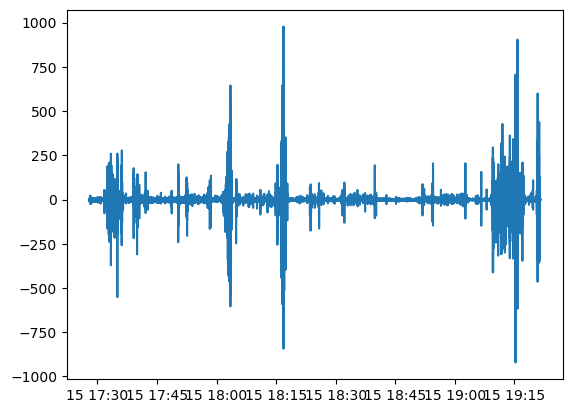

In [34]:
figure, ax = plt.subplots()
ax.plot(biosig['Cleaned PPG'])
plt.show()

In [35]:
print('Extracting PPG peaks...')
ppg_peaks = np.where(biosig["PPG_Peaks"] != 0)[0]
if len(ppg_peaks) == 0:
    raise ValueError("No PPG peaks found in the signal. Check the input.")

print("Mapping PPG peak indices to timestamps...")
timestamps_ppg = biosig.index[ppg_peaks]

if len(timestamps_ppg) != len(ppg_peaks):
    raise ValueError("Mismatch between PPG peaks and timestamps. Verify data alignment.")

print("Preparing PPG RR intervals DataFrame...")
ibi_PPG = np.diff(timestamps_ppg)  # Result is timedelta64[ns]
ibi_PPG = ibi_PPG.astype('timedelta64[ms]').astype(float)  # Convert to milliseconds as float

if len(ibi_PPG) == 0:
    raise ValueError("No valid RR intervals calculated from PPG peaks. Check input data.")

pd_PPG_peaks = pd.DataFrame({"ibi": ibi_PPG}, index=timestamps_ppg[:-1])
pd_PPG_peaks.index = pd.to_datetime(pd_PPG_peaks.index, utc=True)

if pd_PPG_peaks.empty:
    raise ValueError("Generated PPG RR intervals DataFrame is empty. Check timestamp mapping.")

print(f"PPG RR intervals DataFrame prepared with {len(pd_PPG_peaks)} entries.")

Extracting PPG peaks...
Mapping PPG peak indices to timestamps...
Preparing PPG RR intervals DataFrame...
PPG RR intervals DataFrame prepared with 2189 entries.


In [36]:
hrv_features_ppg = flirt.get_hrv_features(
    pd_PPG_peaks["ibi"],
    window_size,
    window_step_size,
    ["td", "fd", "stat", "nl"],
    clean_data=True,
    threshold=.1,
)
print('HRV Features from Empatica PPG:')
hrv_features_ppg.head()

HRV features: 100%|██████████| 450/450 [00:00<00:00, 10771.87it/s]

HRV Features from Empatica PPG:


,num_ibis,hrv_mean_nni,hrv_median_nni,hrv_range_nni,hrv_sdsd,hrv_rmssd,hrv_nni_50,hrv_pnni_50,hrv_nni_20,hrv_pnni_20,...,hrv_pct_95,hrv_entropy,hrv_perm_entropy,hrv_svd_entropy,hrv_SD1,hrv_SD2,hrv_SD2SD1,hrv_CSI,hrv_CVI,hrv_CSI_Modified
datetime,,,,,,,,,,,,,,,,,,,,,
2024-10-15 17:29:01+00:00,5,1276.80000,1292.00,641.0000,345.337878,360.802578,4.0,80.000000,4.0000,80.000000,...,1489.600,NaN,NaN,NaN,281.967197,234.720898,0.832440,0.832440,6.024870,781.564673
2024-10-15 17:29:16+00:00,3,1276.03125,1287.75,663.9375,349.420703,365.530570,4.0,79.166667,4.0625,80.208333,...,1505.125,NaN,NaN,NaN,284.635351,242.899905,0.850792,0.850792,6.040724,835.634827
2024-10-15 17:29:31+00:00,0,1275.26250,1283.50,686.8750,353.503527,370.258562,4.0,78.333333,4.1250,80.416667,...,1520.650,NaN,NaN,NaN,287.303505,251.078912,0.869143,0.869143,6.056578,889.704981
2024-10-15 17:29:46+00:00,0,1274.49375,1279.25,709.8125,357.586352,374.986555,4.0,77.500000,4.1875,80.625000,...,1536.175,NaN,NaN,NaN,289.971660,259.257919,0.887495,0.887495,6.072432,943.775134
2024-10-15 17:30:01+00:00,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


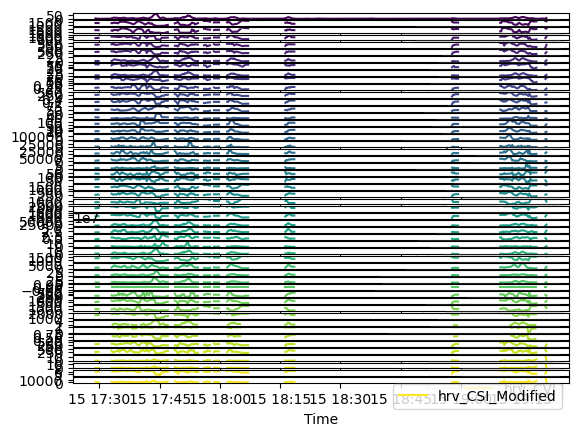

In [37]:
nk.signal_plot(hrv_features_ppg, subplots=True)

In [13]:
eda_features = flirt.eda.get_eda_features(
    biosig['Cleaned EDA'],
    window_size,
    window_step_size,
    256
)
print('EDA Features from Empatica Extracted:')
eda_features.head()

EDA features:   0%|          | 0/454 [00:00<?, ?it/s]

Identify features of most importance from Hossain's paper

In [14]:
ECG_HRV_DF = hrv_features_ecg[['hrv_hf', 'hrv_max', 'hrv_mean_hr', 'num_ibis', 'hrv_rmssd', 'hrv_entropy', 'hrv_SD2SD1', 'hrv_lf_hf_ratio']]
ECG_HRV_DF.index = hrv_features_ecg.index

PPG_HRV_DF = hrv_features_ppg[['hrv_hf', 'hrv_max', 'hrv_mean_hr', 'num_ibis', 'hrv_rmssd', 'hrv_entropy', 'hrv_SD2SD1', 'hrv_lf_hf_ratio']]
PPG_HRV_DF.index = hrv_features_ppg.index

RESP_DF = biosig[['RSP_Rate', 'RSP_RVT', 'RSP_Amplitude']]
RESP_DF.index = biosig.index

EDA_DF = eda_features[['tonic_mean', 'tonic_max', 'tonic_energy', 'tonic_n_above_mean', 'phasic_mean', 'phasic_max', 'phasic_energy', 'phasic_n_above_mean']]
EDA_DF.index = eda_features.index

Scale the features using sklearn minmaxscaler

In [15]:
%matplotlib widget
def scale_df(dataframe):
    from sklearn.preprocessing import MinMaxScaler
    import pandas as pd

    scaler = MinMaxScaler()
    scaled = pd.DataFrame(index=dataframe.index)

    for column in dataframe.columns:
        scaled[column] = scaler.fit_transform(dataframe[[column]].values).flatten()

    return scaled

scaled_ecg_hrv = scale_df(ECG_HRV_DF)
scaled_ppg_hrv = scale_df(PPG_HRV_DF)
scaled_resp_df = scale_df(RESP_DF)
scaled_eda_df = scale_df(EDA_DF)

In [16]:
# import pandas as pd
# import numpy as np

# def expand_dataframe(dataframe, target_dataframe, sampling_rate=256):
#     expanded_results = []

#     for _, row in dataframe.iterrows():
#         start_time = row["Start_Time"]
#         end_time = row["End_Time"]

#         timestamps = pd.date_range(
#             start=start_time, end=end_time, freq=f"{1000/sampling_rate}ms"
#         )

#         repeated_data = pd.DataFrame(
#             {
#                 "Time": timestamps,
#                 **{
#                     col: row[col]
#                     for col in dataframe.columns
#                     if col not in ["Start_Time", "End_Time"]
#                 },
#             }
#         )

#         expanded_results.append(repeated_data)

#     output_dataframe = pd.concat(expanded_results, ignore_index=True)
#     output_dataframe.index = target_dataframe.index[: len(output_dataframe)]
#     return output_dataframe


# hrv_results = expand_dataframe(hrv_dataframe, biosig)
# hrv_results.drop(labels=['Time', 'HRV_SDANN1', 'HRV_SDANN2', 'HRV_SDNNI1', 'HRV_SDNNI2', 'HRV_SDANN5', 'HRV_SDNNI5', 'HRV_ULF', 'HRV_VLF'], axis=1, inplace=True)
# hrv_results.head()
# hrv_results.describe()

## CPD through ClaSP

This algorithm is quite heavy, recommend subsetting the signal for exploration purposes.

The dominant window sizes are determined mathematically by a FFT and taking the most dominant frequency.

In [17]:
def clasp_cpd(series, n_cps=11, period_size=10):
    from sktime.annotation.clasp import ClaSPSegmentation, find_dominant_window_sizes

    dominant_period_size = find_dominant_window_sizes(series)
    #print("Dominant Period:", dominant_period_size)
    period_size = dominant_period_size

    clasp = ClaSPSegmentation(period_length=period_size, n_cps=n_cps)

    found_cps = clasp.fit_predict(series)
    profiles = clasp.profiles
    scores = clasp.scores

    print("The found change points are:", found_cps.to_numpy())
    return found_cps, profiles, scores

def calc_clasp_cpd(scaled_df, n_cps=10):
    results = {}
    for signal_name in scaled_df.columns:
        signal_series = scaled_df[signal_name]
        
        print(f"detecting anomalies for: {signal_name}:")
        found_cps, profiles, scores = clasp_cpd(signal_series, n_cps=n_cps)
        
        results[signal_name] = {
            "change_points": found_cps,
            "profiles": profiles,
            "scores": scores
        }
    return results
ecg_results_clasp = calc_clasp_cpd(scaled_ecg_hrv, 100)
ppg_results_clasp = calc_clasp_cpd(scaled_ppg_hrv, 100)
#resp_results_clasp = calc_clasp_cpd(scaled_resp_df, 1)
eda_results_clasp = calc_clasp_cpd(scaled_eda_df, 100)

detecting anomalies for: hrv_hf:
The found change points are: [[158]
 [ 42]
 [425]]
detecting anomalies for: hrv_max:
The found change points are: [[194]
 [ 87]]
detecting anomalies for: hrv_mean_hr:
The found change points are: [[153]
 [181]
 [305]
 [349]]
detecting anomalies for: num_ibis:
The found change points are: [[239]
 [281]]
detecting anomalies for: hrv_rmssd:
The found change points are: [[161]
 [228]
 [ 31]]
detecting anomalies for: hrv_entropy:
The found change points are: [[239]
 [283]
 [345]
 [319]]
detecting anomalies for: hrv_SD2SD1:
The found change points are: [[ 33]
 [124]
 [294]
 [325]
 [170]]
detecting anomalies for: hrv_lf_hf_ratio:
The found change points are: [[172]
 [341]]
detecting anomalies for: hrv_hf:
The found change points are: [[0]]
detecting anomalies for: hrv_max:
The found change points are: [[0]]
detecting anomalies for: hrv_mean_hr:
The found change points are: [[0]]
detecting anomalies for: num_ibis:
The found change points are: [[278]
 [142]
 [ 4

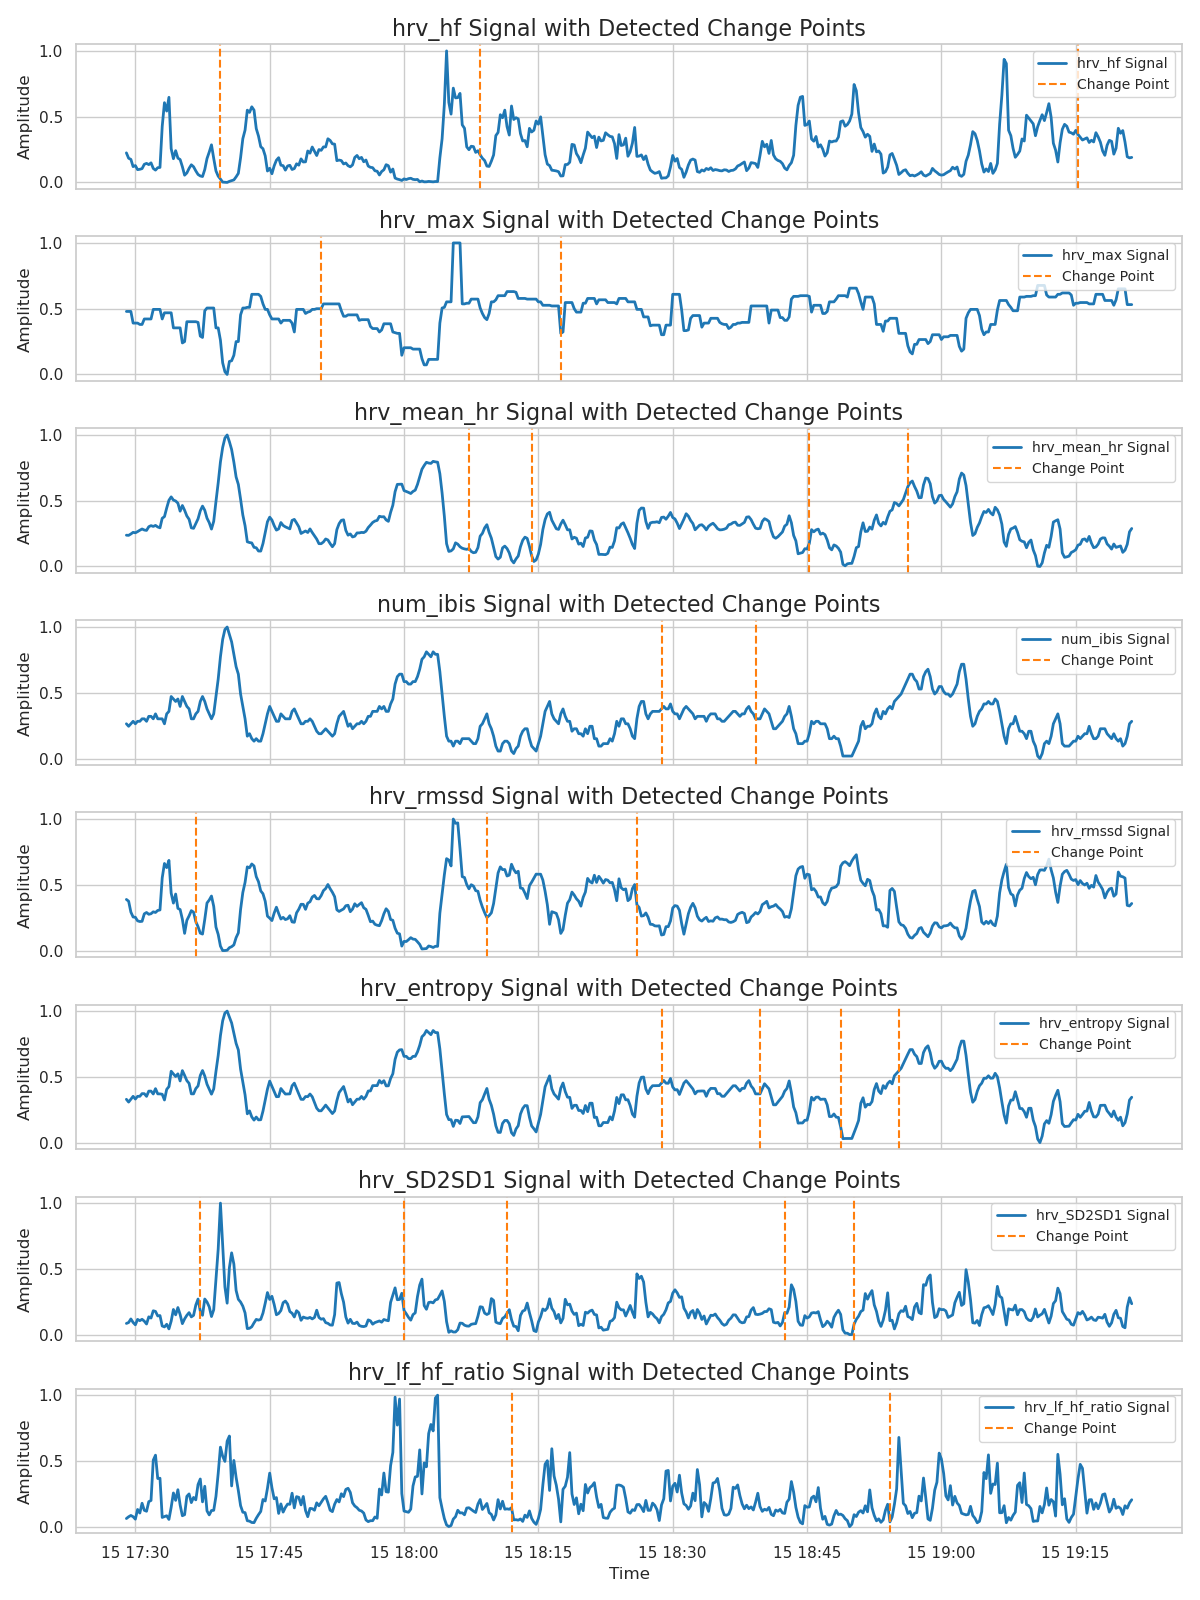

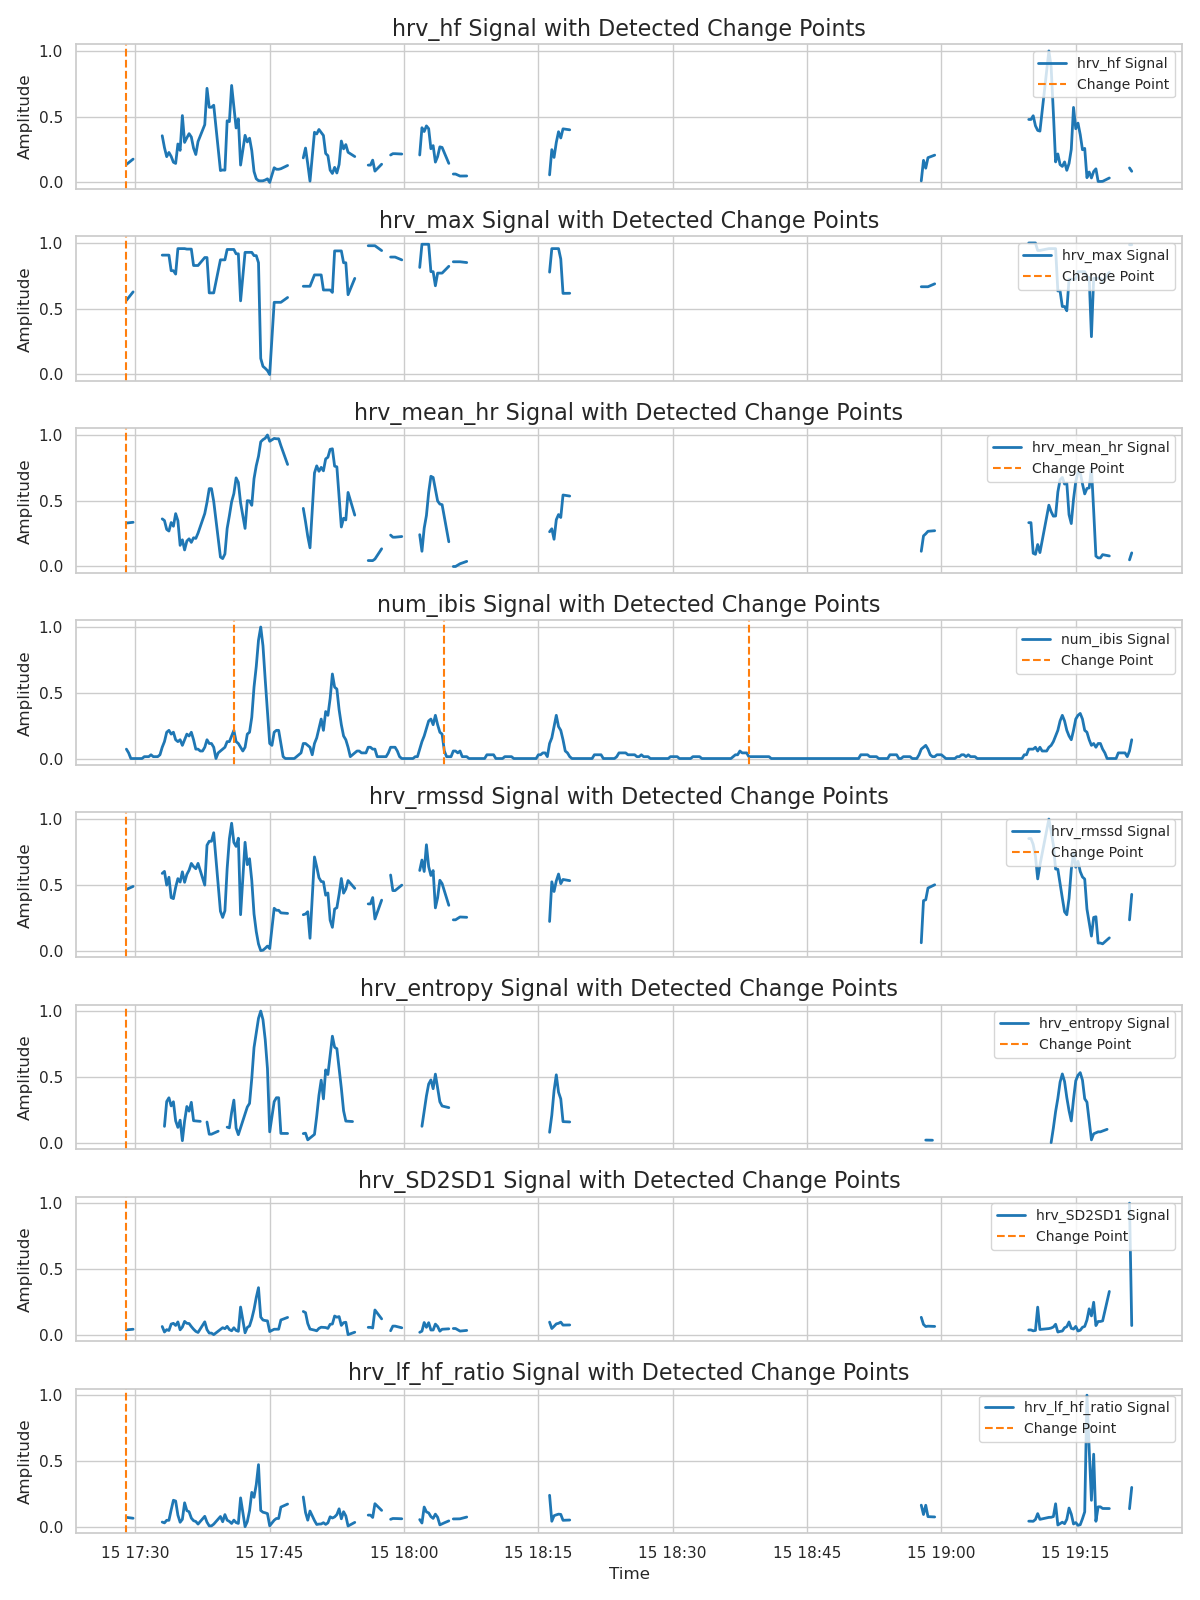

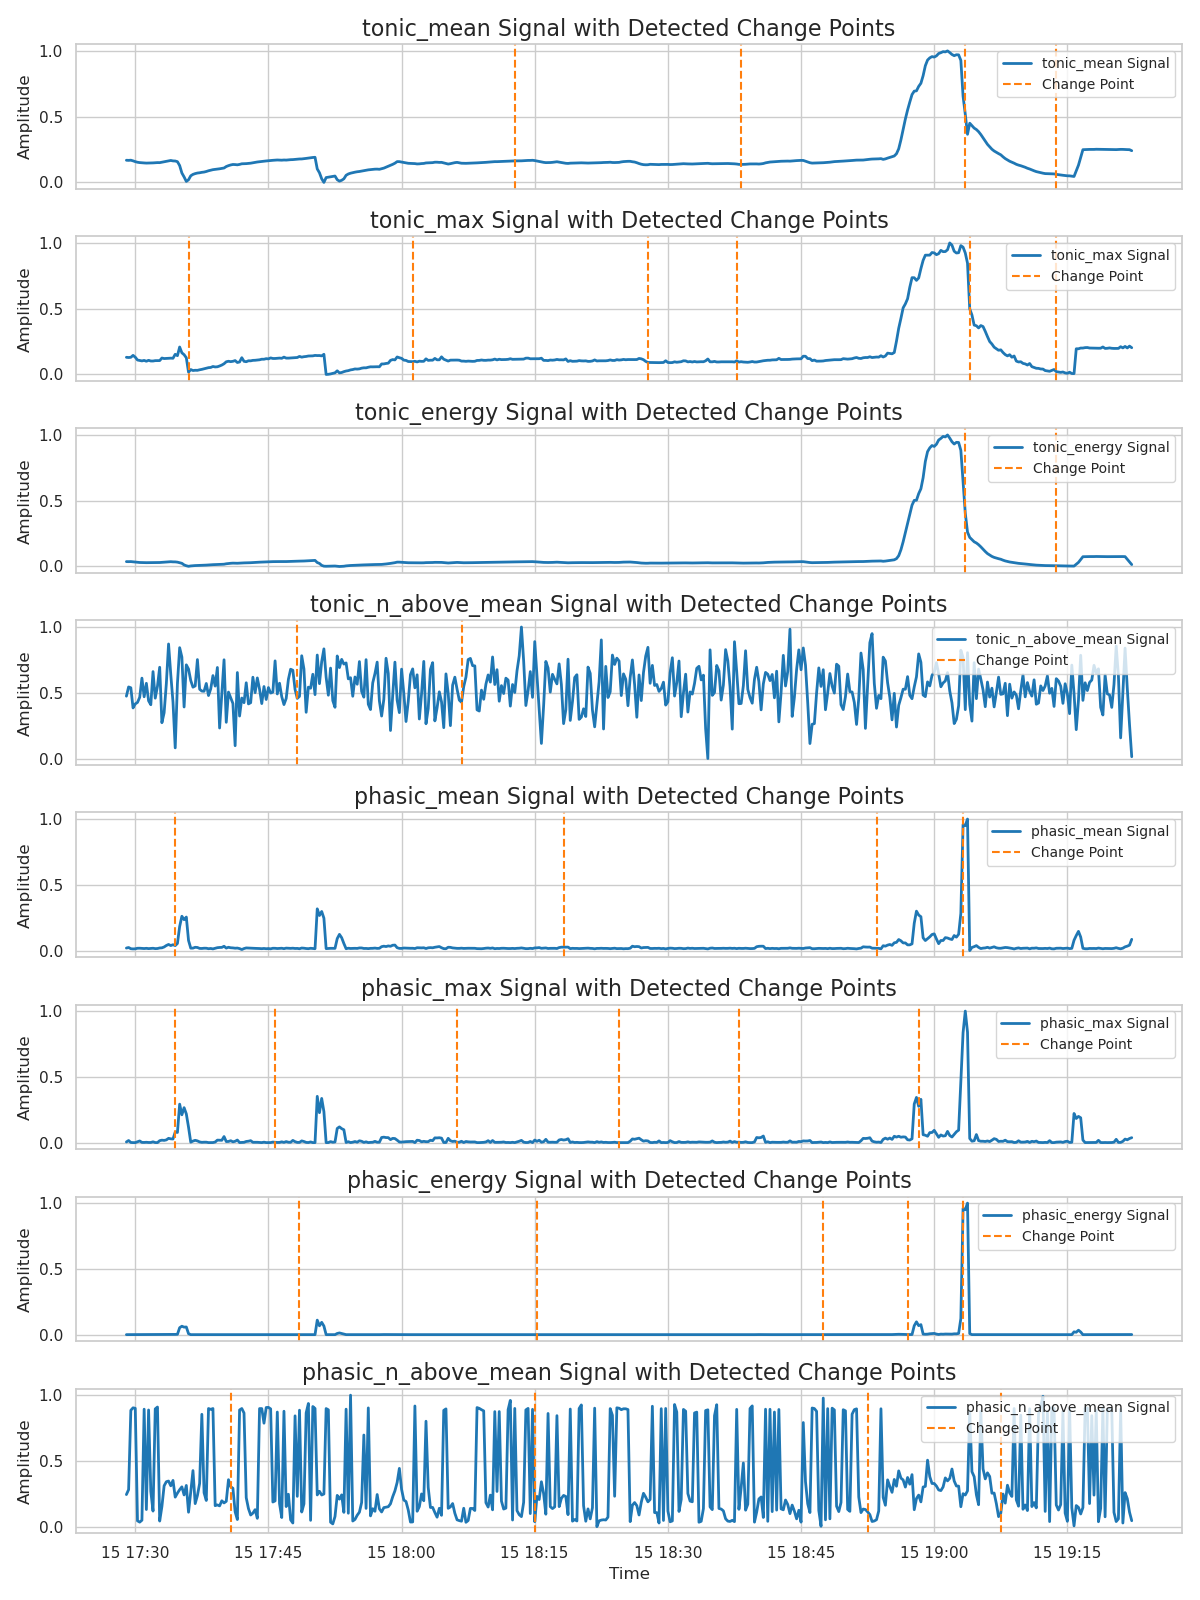

In [ ]:
def plot_changepoints_subplots(signals_df, clasp_results):
    import matplotlib.pyplot as plt
    import numpy as np
    import seaborn as sns

    sns.set_theme(style="whitegrid")
    num_signals = len(clasp_results)

    fig, axes = plt.subplots(num_signals, 1, figsize=(12, 2 * num_signals), sharex=True)

    if num_signals == 1:
        axes = [axes]

    for ax, (signal, clasp_results) in zip(axes, clasp_results.items()):
        if signal not in signals_df.columns:
            print(f"Signal '{signal}' not found in the DataFrame. Skipping.")
            continue

        change_points = clasp_results["change_points"]["ilocs"].to_numpy()
        change_points = np.sort(change_points)

        time_axis = signals_df.index if isinstance(signals_df.index, pd.DatetimeIndex) else np.arange(len(signals_df))

        signal_series = signals_df[signal].values

        ax.plot(
            time_axis,
            signal_series,
            label=f"{signal} Signal",
            color=sns.color_palette("tab10")[0],
            linewidth=2
        )

        for idx in change_points:
            ax.axvline(
                time_axis[idx],
                color=sns.color_palette("tab10")[1],
                linestyle="--",
                label="Change Point" if idx == change_points[0] else None
            )
        ax.set_title(f"{signal} Signal with Detected Change Points", fontsize=16)
        ax.set_ylabel("Amplitude", fontsize=12)
        ax.legend(loc="upper right", fontsize=10)
        ax.grid(True)
    plt.xlabel("Time")
    plt.tight_layout()
    plt.show()

plot_changepoints_subplots(scaled_ecg_hrv, ecg_results_clasp)

plot_changepoints_subplots(scaled_ppg_hrv, ppg_results_clasp)

plot_changepoints_subplots(scaled_eda_df, eda_results_clasp)

## Moving Window CPD Calculation

In [19]:
from skchange.anomaly_detectors import MVCAPA
from skchange.anomaly_scores import L2Saving
from plottingutils import add_subset_segment_anomaly_vrects, plot_multivariate_time_series
from plottingutils import add_changepoint_vlines, plot_multivariate_time_series
import pandas as pd

# Combine datasets
combined_df = pd.concat([scaled_ecg_hrv, scaled_ppg_hrv, scaled_resp_df, scaled_eda_df], axis=1)
combined_df = combined_df.fillna(method="ffill").fillna(method="bfill")

print("Missing values per column after handling:")
print(combined_df.isna().sum())

# Ensure data is clean before fitting the model
subset_anomaly_detector = MVCAPA(
    segment_saving=L2Saving(),
    segment_penalty_scale=1.2,  # Adjust penalty scale
    min_segment_length=10,     # Minimum segment length
    max_segment_length=500,    # Maximum segment length
)

# Fit and predict anomalies
subset_anomalies = subset_anomaly_detector.fit_predict(combined_df)

# Output detected anomaly segments
print("Detected anomaly segments:", subset_anomalies)

fig = plot_multivariate_time_series(combined_df)
add_changepoint_vlines(fig, subset_anomalies)
fig.show()


/tmp/ipykernel_2192892/2812948722.py:9: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  combined_df = combined_df.fillna(method="ffill").fillna(method="bfill")


Missing values per column after handling:
hrv_hf                 0
hrv_max                0
hrv_mean_hr            0
num_ibis               0
hrv_rmssd              0
hrv_entropy            0
hrv_SD2SD1             0
hrv_lf_hf_ratio        0
hrv_hf                 0
hrv_max                0
hrv_mean_hr            0
num_ibis               0
hrv_rmssd              0
hrv_entropy            0
hrv_SD2SD1             0
hrv_lf_hf_ratio        0
RSP_Rate               0
RSP_RVT                0
RSP_Amplitude          0
tonic_mean             0
tonic_max              0
tonic_energy           0
tonic_n_above_mean     0
phasic_mean            0
phasic_max             0
phasic_energy          0
phasic_n_above_mean    0
dtype: int64
Detected anomaly segments:                    ilocs  labels  \
0               [0, 500)       1   
1            [500, 1000)       2   
2           [1000, 1500)       3   
3           [1500, 2000)       4   
4           [2000, 2500)       5   
...                  ...   

KeyboardInterrupt: 

In [20]:
from skchange.anomaly_detectors import MVCAPA
from skchange.anomaly_scores import L2Saving
from plottingutils import add_subset_segment_anomaly_vrects, plot_multivariate_time_series

# MVCAPA configuration
subset_anomaly_detector = MVCAPA(
  # Adjust based on dataset length
)

# Fit and predict
subset_anomalies = subset_anomaly_detector.fit_predict(scaled_eda_df)

print("Detected anomalies (segments):", subset_anomalies)

fig3d = plot_multivariate_time_series(scaled_ecg_hrv)
add_subset_segment_anomaly_vrects(fig3d, subset_anomalies)

Detected anomalies (segments):       ilocs  labels      icolumns
0  [0, 453)       1  [3, 7, 0, 1]


In [39]:
from skchange.change_detectors.moving_window import MovingWindow
from skchange.change_scores import CUSUM

detector = MovingWindow(change_score=CUSUM(), bandwidth=50, threshold_scale=.001)
detected_ecg = detector.fit_predict(scaled_ecg_hrv['hrv_entropy'])


pred_output_fig = plot_multivariate_time_series(scaled_ecg_hrv)
add_changepoint_vlines(pred_output_fig, detected_ecg)

In [33]:
def MovingWindowCPD(signal_series, signal_name="Signal", bandwidth=100, thresh=1.0):
    from skchange.change_detectors.moving_window import MovingWindow
    from skchange.change_scores import CUSUM

    # Initialize the moving window detector
    detector = MovingWindow(
        change_score=CUSUM(),  # Measures difference in mean between intervals
        bandwidth=bandwidth,
        threshold_scale=thresh,
    )
    # Fit and predict change points
    change_points_series = detector.fit_predict(signal_series)
    print(f"{signal_name} Detected change points: {len(change_points_series)}")
    
    # Extract change point indices
    change_points_idx = change_points_series["ilocs"].values

    return change_points_idx

def calc_moving_window_cpd(dataframe):
    results_moving_window = {}

    for signal_name in dataframe.columns:
        signal_series = dataframe[signal_name].values
        print(f"Analyzing '{signal_name}':")
        
        change_points_idx = MovingWindowCPD(
            signal_series, 
            signal_name=signal_name, 
            bandwidth=10,  # Adjustable parameter
            thresh=.01  # Adjustable threshold
        )
        
        results_moving_window[signal_name] = {
            "change_points": {
                "ilocs": change_points_idx
            }
        }
    return results_moving_window

#detected = MovingWindow.fit_predict(scaled_ecg_hrv)
#results_moving_window_ecg = calc_moving_window_cpd(scaled_ecg_hrv)
#results_moving_window = calc_moving_window_cpd(scaled_eda_df)
#plot_changepoints_subplots(scaled_ecg_hrv, results_moving_window_ecg)


AttributeError: 'numpy.ndarray' object has no attribute 'to_numpy'

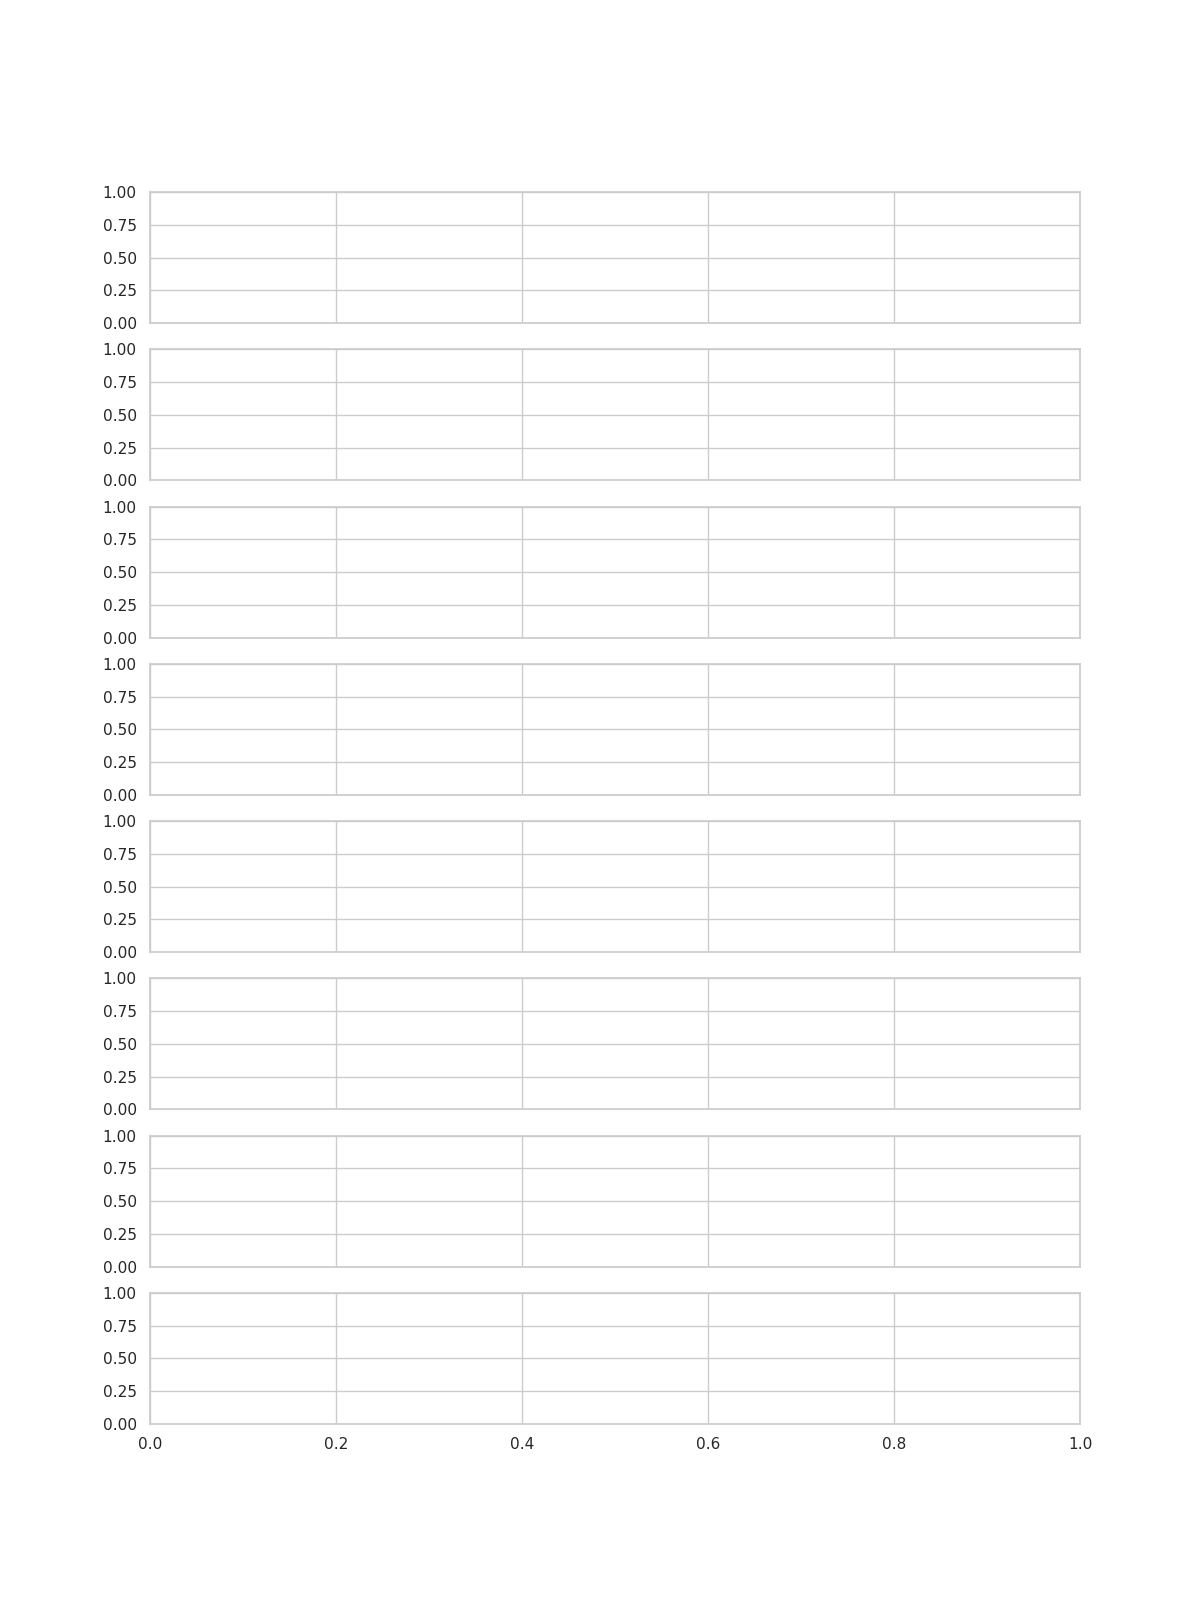

In [18]:
def plot_changepoints_subplots_mw(signals_df, results):
    import matplotlib.pyplot as plt
    import numpy as np
    import seaborn as sns

    # Apply Seaborn style for better aesthetics
    sns.set_theme(style="whitegrid")

    # Number of signals
    num_signals = len(results)
    
    # Create subplots
    fig, axes = plt.subplots(num_signals, 1, figsize=(12, 2 * num_signals), sharex=True)

    # Ensure axes is iterable for a single signal
    if num_signals == 1:
        axes = [axes]

    for ax, (signal, result) in zip(axes, results.items()):
        if signal not in signals_df.columns:
            print(f"Signal '{signal}' not found in the DataFrame. Skipping.")
            continue

        # Directly use the NumPy array
        change_points = np.sort(result["change_points"]["ilocs"])
        signal_series = signals_df[signal].values

        ax.plot(
            signal_series, 
            label=f"{signal} Signal", 
            color=sns.color_palette("tab10")[0],
            linewidth=2
        )

        for idx in change_points:
            ax.axvline(
                idx, 
                color=sns.color_palette("tab10")[1], 
                linestyle="--", 
                label="Change Point" if idx == change_points[0] else None
            )

        ax.set_title(f"{signal} Signal with Detected Change Points", fontsize=16)
        ax.set_ylabel("Amplitude", fontsize=12)
        ax.legend(loc="upper right", fontsize=10)
        ax.grid(True)

    plt.title('Moving Window CPD')
    plt.xlabel("Time", fontsize=12)
    plt.tight_layout()
    plt.show()

plot_changepoints_subplots(scaled_ecg_hrv, results_moving_window)

## DTW Kernel

TODO: Segment the anomalous regions and compare them against each other

In [35]:
from sktime.dists_kernels.dtw import DtwDist
import numpy as np


X1 = ECG_R_Peaks.values[0:1000].reshape(-1, 1)
X2 = PPG_Peaks.values[0:1000].reshape(-1, 1)


d = DtwDist(weighted=True, derivative=True)


dist = d.transform(X1, X2)

# Display the distance
print("DTW Distance between the two time series:")
print(dist)

DTW Distance between the two time series:
[[0.90625]]


GAF Calculation Experiment

In [50]:
signal = scaled_eda_df['tonic_energy']
detected_cps = detector.fit_predict(signal)
cp_idx = detected_cps['ilocs'].values[0:10]
cp_idx
print(signal.index)


DatetimeIndex(['2024-10-15 17:29:00+00:00', '2024-10-15 17:29:15+00:00',
               '2024-10-15 17:29:30+00:00', '2024-10-15 17:29:45+00:00',
               '2024-10-15 17:30:00+00:00', '2024-10-15 17:30:15+00:00',
               '2024-10-15 17:30:30+00:00', '2024-10-15 17:30:45+00:00',
               '2024-10-15 17:31:00+00:00', '2024-10-15 17:31:15+00:00',
               ...
               '2024-10-15 19:20:00+00:00', '2024-10-15 19:20:15+00:00',
               '2024-10-15 19:20:30+00:00', '2024-10-15 19:20:45+00:00',
               '2024-10-15 19:21:00+00:00', '2024-10-15 19:21:15+00:00',
               '2024-10-15 19:21:30+00:00', '2024-10-15 19:21:45+00:00',
               '2024-10-15 19:22:00+00:00', '2024-10-15 19:22:15+00:00'],
              dtype='datetime64[ns, UTC]', length=454, freq=None)


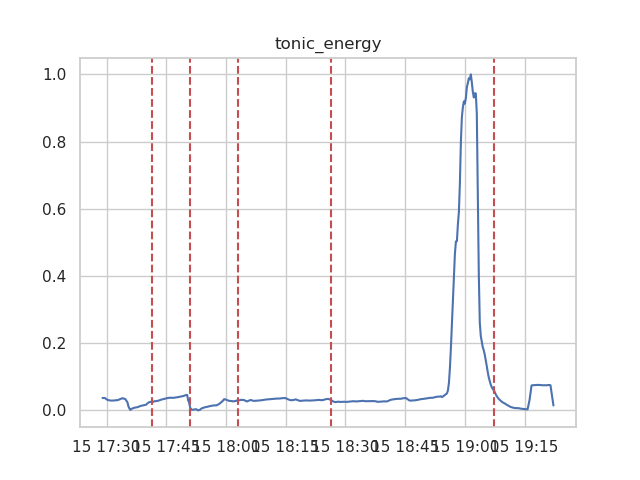

In [62]:
fig, ax = plt.subplots()
ax.plot(signal.index, signal)
for idx in cp_idx:
    ax.axvline(signal.index[idx], color='r', linestyle='--')
ax.set_title('tonic_energy')
plt.show()

Shape of GADF: (50, 50)


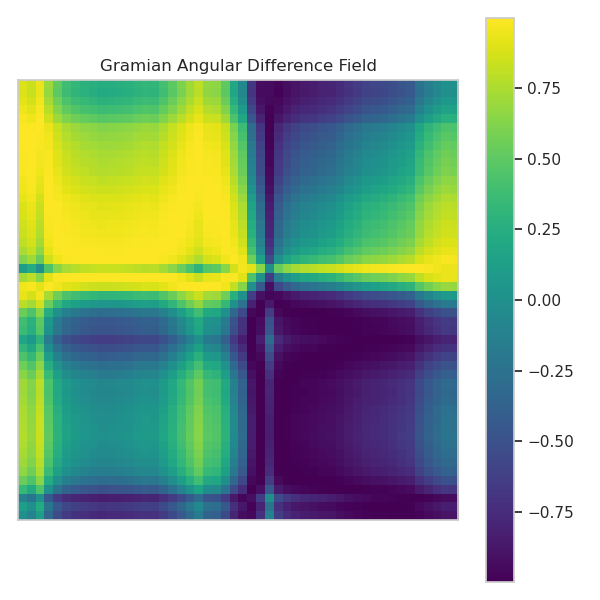

Shape of GADF: (38, 38)


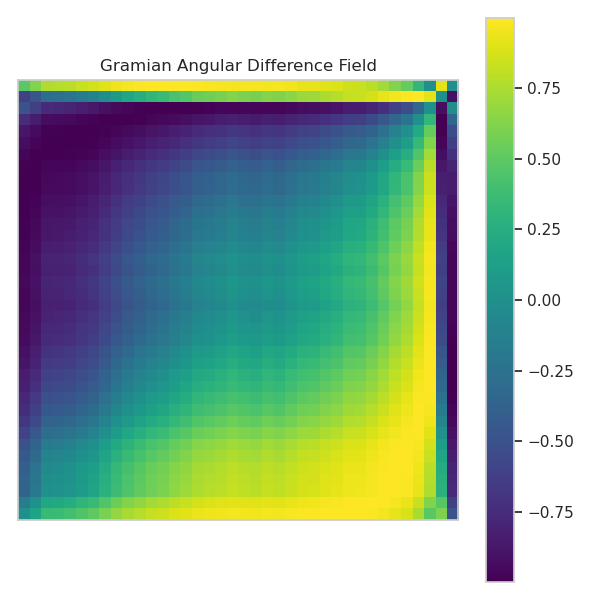

Shape of GADF: (48, 48)


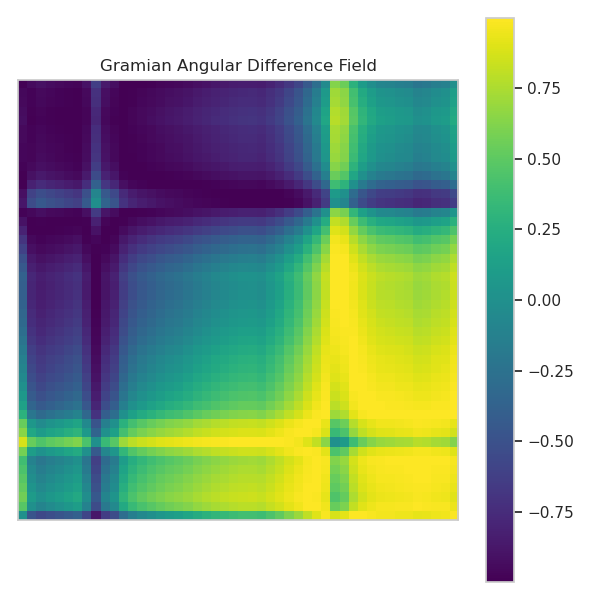

In [48]:
import neurokit2 as nk
import numpy as np
import math
import matplotlib.pyplot as plt




def gramian_angular_difference_field(signal):
    """
    Computes the Gramian Angular Difference Field (GADF) of a 1D signal.

    Args:
        signal (np.ndarray): The 1D input signal (e.g., a time series).

    Returns:
        np.ndarray: The GADF matrix.
    """
    if not isinstance(signal, np.ndarray):
        signal = np.asarray(signal)

    min_val = np.min(signal)
    max_val = np.max(signal)
    scaled_signal = (2 * signal - max_val - min_val) / (max_val - min_val)
    scaled_signal = np.clip(scaled_signal, -1, 1)

    phi = np.arccos(scaled_signal)


    gadf = np.sin(np.subtract.outer(phi, phi))
    return gadf


def compute_and_plot_gadf(signal):
    """
    Computes and plots the GADF for a given signal.

    Args:
        signal (np.ndarray): The 1D input signal.
    """
    gadf_matrix = gramian_angular_difference_field(signal)
    print("Shape of GADF:", gadf_matrix.shape)

    # Visualize the GADF Matrix
    plt.figure(figsize=(6, 6))
    plt.imshow(gadf_matrix, cmap="viridis", origin="lower")
    plt.title("Gramian Angular Difference Field")
    plt.colorbar()
    plt.xticks([])
    plt.yticks([])
    plt.tight_layout()
    plt.show()
#array([ 50,  88, 136, 230, 393])
compute_and_plot_gadf(signal[0:50])
compute_and_plot_gadf(signal[50:88])
compute_and_plot_gadf(signal[88:136])